In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
filename = "./data/clean_dataset.csv"
df = pd.read_csv(filename)

In [5]:
# Remove spaces in world port index (FR BES => FRBES) for consistency
df["code"] = df["code"].apply(lambda code: code.replace(" ", ""))

In [6]:
# Number of unique world port index

output_vocab = df["code"].unique()
print(len(output_vocab))

226


max occurence: 12 | min occurence: 1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa538ff2710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa538ff2cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa538ff24a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5390082b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa539008588>],
 'means': []}

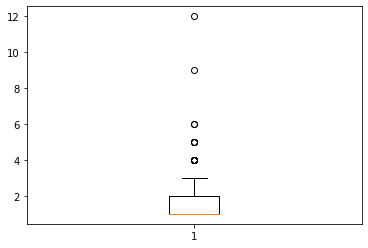

In [8]:
# Number of occurences by world port index

occurences = df.groupby(["code"])["input"].count()
print(f"max occurence: {occurences.max()} | min occurence: {occurences.min()}")
plt.boxplot(occurences)

In [10]:
print(f"World port index appearing once: {occurences[occurences == 1].count() / len(df.code.unique()):2.2%}")
print(f"World port index appearing < 3): {occurences[occurences < 3].count() / len(df.code.unique()):2.2%}")

World port index appearing once: 70.35%
World port index appearing < 3): 86.28%
